In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv("boston.csv")
df

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [29]:
class Ridge_Regression():

    def __init__(self,iterations,learning_rate,l2_penalty):
        self.iterations=iterations
        self.learning_rate=learning_rate
        self.l2_penalty=l2_penalty

    def fit(self,x,y):
        self.x=x
        self.y=y
        self.m,self.n=x.shape
        self.w=np.zeros(self.n)
        self.b=0
        for i in range(self.iterations):
            self.gradient_weight()
        return self
    
    def gradient_weight(self):
        y_hat=self.prediction(self.x)
        dw=np.zeros(self.n)
        for j in range(self.n):
            dw[j]=(2*((self.x[:,j]).dot(y_hat-self.y))+(self.l2_penalty*self.w[j]))/self.m
        
        db=(2*np.sum(y_hat-self.y))/self.m

        self.w=self.w-self.learning_rate*dw
        self.b=self.b-self.learning_rate*db
        return self
    
    def prediction(self,x):
        return x.dot(self.w)+self.b

In [30]:
class Lasso_Regression():
    def __init__(self,it,a,l1):
        self.it=it
        self.a=a
        self.l1=l1
    def fit(self,x,y):
        self.x=x
        self.y=y
        self.m,self.n=x.shape
        self.w=np.zeros(self.n)
        self.b=0.0
        for i in range(self.it):
            self.g()
        return self
    def g(self):
        yh=self.p(self.x)
        dw=np.zeros(self.n)
        for j in range(self.n):
            dw[j]=(2*(self.x[:,j].dot(yh-self.y))+self.l1*np.sign(self.w[j]))/self.m
        db=(2*np.sum(yh-self.y))/self.m
        self.w=self.w-self.a*dw
        self.b=self.b-self.a*db
        return self
    def p(self,x):
        return x.dot(self.w)+self.b

In [31]:
y=df["medv"].values
x=df.drop(columns=["medv"]).values.astype(float)
x.shape,y.shape

((506, 14), (506,))

In [32]:
mu = x.mean(axis=0, keepdims=True)
sg = x.std(axis=0, keepdims=True)
x = (x - mu) / (sg)

In [33]:
np.random.seed(0)
idx=np.random.permutation(len(x))
k=int(len(x)*(2/3))
tr=idx[:k]
te=idx[k:]
xtr,xt=x[tr],x[te]
ytr,yt=y[tr],y[te]
xtr.shape,xt.shape

((337, 14), (169, 14))

In [35]:
r=Ridge_Regression(iterations=4000,learning_rate=0.01,l2_penalty=1.0).fit(xtr,ytr)
pr=r.prediction(xt)
mr=np.mean((yt-pr)**2)
mr

23.774326854505095

In [36]:
l=Lasso_Regression(it=6000,a=0.005,l1=1.0).fit(xtr,ytr)
pl=l.p(xt)
ml=np.mean((yt-pl)**2)
ml

23.755249408631084

In [37]:
mr,ml

(23.774326854505095, 23.755249408631084)

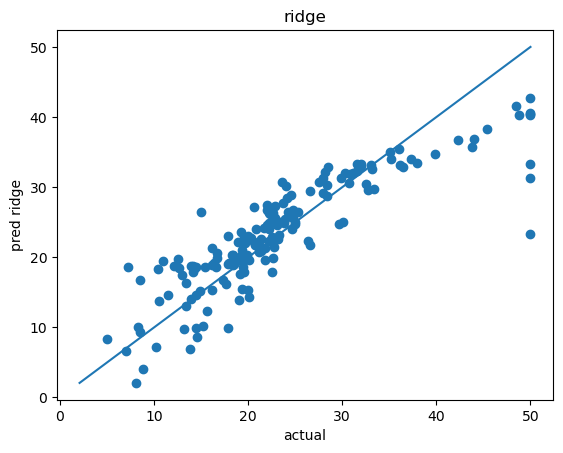

In [38]:
plt.scatter(yt,pr)
a=min(yt.min(),pr.min())
b=max(yt.max(),pr.max())
plt.plot([a,b],[a,b])
plt.xlabel("actual")
plt.ylabel("pred ridge")
plt.title("ridge")
plt.show()

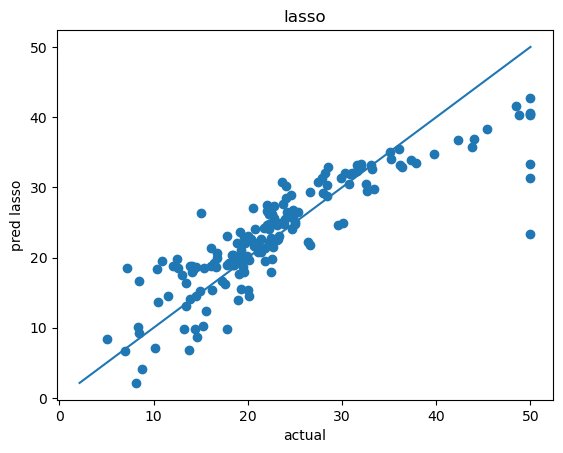

In [39]:
plt.scatter(yt,pl)
a=min(yt.min(),pl.min())
b=max(yt.max(),pl.max())
plt.plot([a,b],[a,b])
plt.xlabel("actual")
plt.ylabel("pred lasso")
plt.title("lasso")
plt.show()